In [18]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, datasets, models 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 


In [8]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

- imamo 60.000 slika, velicine 28x28

In [9]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images.max(), train_images.min()

(255, 0)

In [13]:
train_images = train_images/255.0
test_images = test_images/255.0

In [14]:
test_images.min(), test_images.max()

(0.0, 1.0)

In [15]:
train_images.min(), train_images.max()

(0.0, 1.0)

In [16]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# model.add(layers.Flatten(input_shape=(28,28), activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [35]:
train_labels_cat = tf.keras.utils.to_categorical(train_labels)
test_labels_cat = tf.keras.utils.to_categorical(test_labels)

epochs = 10
class_size = len(class_names)

model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


history = model.fit(train_images, train_labels_cat, epochs=85, validation_data=(test_images, test_labels_cat))

Epoch 1/85


2023-06-04 19:49:27.129687: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 27s 13ms/step - loss: 0.1417 - accuracy: 0.9471 - val_loss: 0.4190 - val_accuracy: 0.8875
Epoch 2/85
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1375 - accuracy: 0.9485 - val_loss: 0.4144 - val_accuracy: 0.8900
Epoch 3/85
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1382 - accuracy: 0.9478 - val_loss: 0.4274 - val_accuracy: 0.8891
Epoch 4/85
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1311 - accuracy: 0.9510 - val_loss: 0.4529 - val_accuracy: 0.8877
Epoch 5/85
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1311 - accuracy: 0.9509 - val_loss: 0.4258 - val_accuracy: 0.8897
Epoch 6/85
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1287 - accuracy: 0.9519 - val_loss: 0.4236 - val_accuracy: 0.8904
Epoch 7/85
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1259 - accuracy: 0.9538 - val_loss: 0.4606 - val_accura

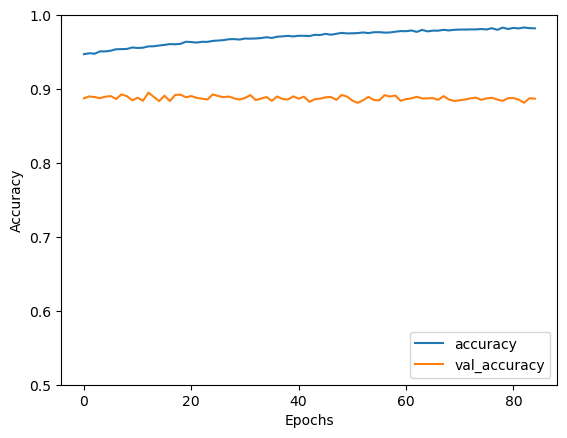

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [37]:
print(model.evaluate(test_images, test_labels_cat, verbose=2))

313/313 - 8s - loss: 0.8614 - accuracy: 0.8870 - 8s/epoch - 24ms/step
[0.8614102602005005, 0.8870000243186951]


In [38]:
predictions = model.predict(test_images)

313/313 [==============================] - 14s 12ms/step


In [39]:
predictions[0]

array([1.8587633e-37, 1.5111488e-34, 3.0098041e-23, 0.0000000e+00,
       6.2789778e-31, 3.7651389e-11, 4.8489043e-33, 7.4080011e-13,
       7.5208181e-27, 9.9999994e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9